In [254]:
import sys
import StepMiner as smn
import HegemonUtil as hu
import re
import numpy as np
import scipy
import io
from scipy import io
import math
import itertools
from itertools import combinations 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import statsmodels.stats.proportion
import seaborn as sns
import scanpy as sc
import GEOparse

In [4]:
def types_dict(path, sep=',', header=0):
    df = pd.read_csv(path, nrows=3, sep=sep, header=header)
    for i in df.columns[1:]:
        df[i] = pd.to_numeric(df[i], downcast='unsigned')
    dtypes = df.dtypes
    colnames = dtypes.index
    types = [i.name for i in dtypes.values]
    column_types = dict(zip(colnames, types))
    return(column_types)

In [8]:
pathdir = "/Users/rohan/public_html/Hegemon/Data2/Data/GSE148077/rawData/"

i='GSE148077_count_mat_donor_H1.csv'
print("starting "+i)
typedict=types_dict(pathdir+i, sep=',', header=0)
print("dict")
expr = pd.DataFrame(pd.read_csv(pathdir+i, sep = ',', header=0, dtype=typedict))   
print("read")
print("finished "+i)

files = ['GSE148077_count_mat_donor_H2.csv','GSE148077_count_mat_donor_H3.csv',\
         'GSE148077_count_mat_donor_H4.csv', 'GSE148077_count_mat_donor_H5.csv', \
         'GSE148077_count_mat_donor_H9.csv','GSE148077_count_mat_donor_H11.csv']

for i in files:
    print("starting "+i)
    typedict=types_dict(pathdir+i, sep=',', header=0)
    print("dict")
    df = pd.DataFrame(pd.read_csv(pathdir+i, sep = ',', header=0, dtype=typedict))   
    print("read")
    expr = pd.merge(expr, df, on='Unnamed: 0', how="inner")
    print("merged")
    print("finished "+i)

genes = pd.DataFrame()
genes["ProbeID"] = expr['Unnamed: 0']
genes["Name"] = expr['Unnamed: 0']

count_mtx=expr.iloc[:,1:]
adata = sc.AnnData(count_mtx.T)
print("adata tranformed")

pathdir = "/Users/rohan/public_html/Hegemon/Data2/Data/GSE148077"

adata.obs['arr'] = np.array(count_mtx.columns)
adata.var['gene_names'] = np.array(expr["Unnamed: 0"])
adata.var_names = adata.var["gene_names"]
adata.obs_names = adata.obs["arr"]
df = pd.read_csv(pathdir+"/GSE148077-GPL16791-2-survival.txt", sep="\t")
print("Read surv file")
df.index = df.iloc[:,0]
for k in df.columns:
    k1 = re.sub("^c ", "", k)
    k1 = re.sub("^n ", "", k1)
    val = [df[k][i] if i in df.index else '' for i in adata.obs['arr']]
    adata.obs[k1] = val
    print("read column "+k)
    
adata

starting GSE148077_count_mat_donor_H1.csv
dict
read
finished GSE148077_count_mat_donor_H1.csv
starting GSE148077_count_mat_donor_H2.csv
dict
read
merged
finished GSE148077_count_mat_donor_H2.csv
starting GSE148077_count_mat_donor_H3.csv
dict
read
merged
finished GSE148077_count_mat_donor_H3.csv
starting GSE148077_count_mat_donor_H4.csv
dict
read
merged
finished GSE148077_count_mat_donor_H4.csv
starting GSE148077_count_mat_donor_H5.csv
dict
merged
finished GSE148077_count_mat_donor_H5.csv
starting GSE148077_count_mat_donor_H9.csv
dict
read
merged
finished GSE148077_count_mat_donor_H9.csv
starting GSE148077_count_mat_donor_H11.csv
dict
read
merged
finished GSE148077_count_mat_donor_H11.csv


/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


adata tranformed
Read surv file
read column ArrayID
read column time
read column status
read column c title
read column c source_name
read column c organism
read column c type
read column c molecule
read column c cluster
read column c cell type


AnnData object with n_obs × n_vars = 86253 × 33660
    obs: 'arr', 'ArrayID', 'time', 'status', 'title', 'source_name', 'organism', 'type', 'molecule', 'cluster', 'cell type'
    var: 'gene_names'

In [250]:
pathdir = "/Users/rohan/public_html/Hegemon/Data2/Data/GSE148077/"
adata.write(pathdir+"GSE148077_scanpy.h5ad")

ValueError: Unable to create dataset (name already exists)

Above error raised while writing key 'arr' of <class 'h5py._hl.group.Group'> from /.

Above error raised while writing key 'obs' of <class 'h5py._hl.files.File'> from /.

In [ ]:
#dataframe with
genes_mtx = expr.loc[(expr["Unnamed: 0"] == "WWC1") | (expr["Unnamed: 0"] == "PPEF2") | (expr["Unnamed: 0"] == "CASZ1") | (expr["Unnamed: 0"] == "AKAP9") | (expr["Unnamed: 0"] == "ARR3")] 
genes_mtx
df = pd.DataFrame(adata.obs['cell type']).T
df["Unnamed: 0"] = "cell type"
genes_mtx = pd.concat([genes_mtx,df],axis=0)
genes_mtx = genes_mtx.T
genes_mtx.columns = genes_mtx.iloc[-1,]
genes_mtx = genes_mtx.drop("Unnamed: 0", axis=0)

In [69]:
pathdir = "/Users/rohan/public_html/Hegemon/Data2/Data/GSE148077/"
genes_mtx.to_csv(pathdir+"pseudobulk.txt", sep="\t")

In [104]:
genes_mtx = pd.read_csv(pathdir+"pseudobulk.txt", sep="\t", header=0, index_col=0)
genes_mtx

CASZ1  PPEF2  WWC1  AKAP9  ARR3      cell type
H11FoveaS1_AAACCCACAAAGACTA-1      0      0     0      4     1  Bipolar Cells
H11FoveaS1_AAACCCACAGAGAAAG-1      0      0     0      0     0  Bipolar Cells
H11FoveaS1_AAACCCACATCGTGCG-1      0      1     0      1     2           Rods
H11FoveaS1_AAACGAAAGTAGTCAA-1      0      0     0      1     1  Bipolar Cells
H11FoveaS1_AAACGAAGTCAAACGG-1      0      0     0      0     0  Bipolar Cells
...                              ...    ...   ...    ...   ...            ...
H9FoveaS1_TTTGTCAGTGGTGTAG-1       1      3     0     16     0           Rods
H9FoveaS1_TTTGTCAGTGTAAGTA-1       0      0     0      1     0         Muller
H9FoveaS1_TTTGTCAGTGTCAATC-1       0      1     0      1     1           Rods
H9FoveaS1_TTTGTCATCAATCACG-1       0      2     0      0     0           Rods
H9FoveaS1_TTTGTCATCAGTTGAC-1       0      0     0      0     1         Muller

[86253 rows x 6 columns]

In [207]:
#df: matrix of raw counts with genes as column names and cell types as a column
def pseudoBulk(df):
    cell_type = np.unique(np.array(genes_mtx["cell type"]))
    pbDF = pd.DataFrame()
    for i in cell_type:
        print(i)
        tempdf = df.loc[genes_mtx["cell type"] == i]
        tempdf = tempdf.drop("cell type", axis=1)
        pbDF[i+"_PB"] = tempdf.sum(axis=0, skipna=True)
    adata = sc.AnnData(pbDF.T)
    sc.pp.normalize_total(adata, target_sum=1e6,exclude_highly_expressed=True)
    #sc.pp.log1p(adata)
    adata.obs['cell_type'] = np.array(pbDF.columns)
    adata.var['gene_names'] = np.array(pbDF.index)
    adata.var_names = adata.var["gene_names"]
    adata.obs_names = adata.obs['cell_type']
    return(pbDF, adata)

pseudoBulk = pseudoBulk(genes_mtx)

Amacrine Cells
Astrocytes
Bipolar Cells
Cones
Endothelium
Horizontal
Microglia
Muller
Retinal Ganglion Cells
Rods
Unknown


In [208]:
df = pd.DataFrame(pseudoBulk[1].X)
df.columns = pseudoBulk[1].var_names
df.index = pseudoBulk[1].obs_names
df["cell_type"] = df.index
df

gene_names                        CASZ1         PPEF2         WWC1  \
cell_type                                                            
Amacrine Cells_PB          1.032000e+09  2.300000e+07  119000000.0   
Astrocytes_PB              5.000000e+06  1.000000e+06   37000000.0   
Bipolar Cells_PB           1.400000e+08  8.300000e+07   71000000.0   
Cones_PB                   8.710000e+08  4.750000e+08  491000000.0   
Endothelium_PB             6.000000e+06  2.000000e+06    2000000.0   
Horizontal_PB              4.370000e+08  8.000000e+06    3000000.0   
Microglia_PB               1.900000e+07  1.200000e+07    8000000.0   
Muller_PB                  1.088000e+09  1.500000e+08  587000000.0   
Retinal Ganglion Cells_PB  3.100000e+07  9.000000e+06   40000000.0   
Rods_PB                    2.311000e+09  2.104000e+09  209000000.0   
Unknown_PB                 7.010000e+08  1.030000e+08  867000000.0   

gene_names                        AKAP9          ARR3  \
cell_type                                               
Amacrine Cells_PB          1.146700e+10  4.840000e+08   
Astrocytes_PB              3.390000e+08  1.900000e+07   
Bipolar Cells_PB           1.118800e+10  2.836000e+09   
Cones_PB                   8.458000e+09  4.642200e+10   
Endothelium_PB             2.870000e+08  6.300000e+07   
Horizontal_PB              1.531000e+09  2.430000e+08   
Microglia_PB               2.920000e+08  4.320000e+08   
Muller_PB                  6.958000e+09  2.143000e+09   
Retinal Ganglion Cells_PB  1.779000e+09  9.400000e+07   
Rods_PB                    1.481800e+10  1.477200e+10   
Unknown_PB                 3.075100e+10  2.238000e+09   

gene_names                                 cell_type  
cell_type                                             
Amacrine Cells_PB                  Amacrine Cells_PB  
Astrocytes_PB                          Astrocytes_PB  
Bipolar Cells_PB                    Bipolar Cells_PB  
Cones_PB                                    Cones_PB  
Endothelium_PB                        Endothelium_PB  
Horizontal_PB                          Horizontal_PB  
Microglia_PB                            Microglia_PB  
Muller_PB                                  Muller_PB  
Retinal Ganglion Cells_PB  Retinal Ganglion Cells_PB  
Rods_PB                                      Rods_PB  
Unknown_PB                                Unknown_PB

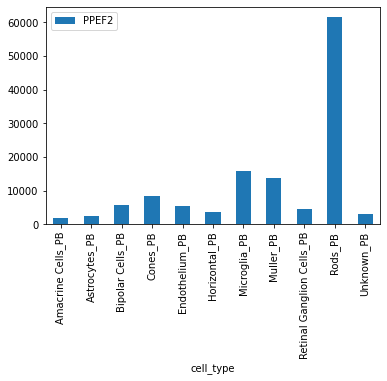

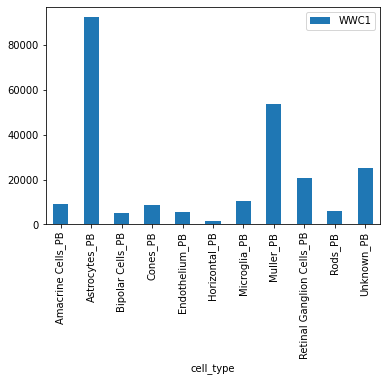

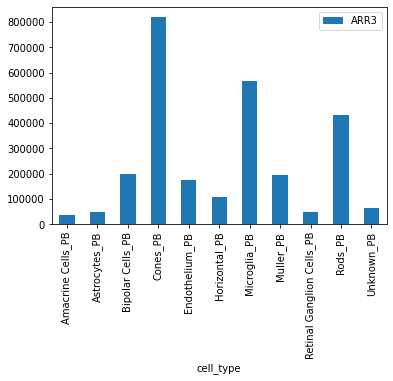

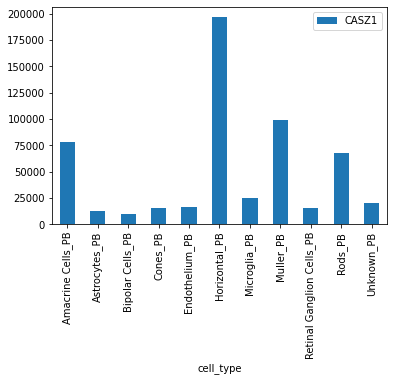

In [182]:
#CPM Normalization, no log
df.plot(x="cell_type", y= "PPEF2", kind="bar")
df.plot(x="cell_type", y= "WWC1", kind="bar")
df.plot(x="cell_type", y= "ARR3", kind="bar")
df.plot(x="cell_type", y= "CASZ1", kind="bar")

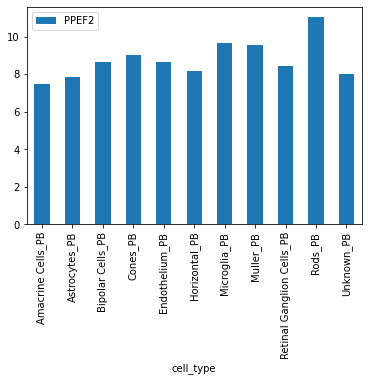

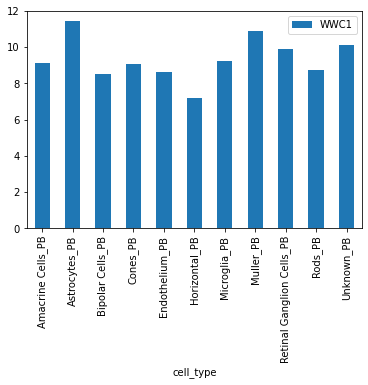

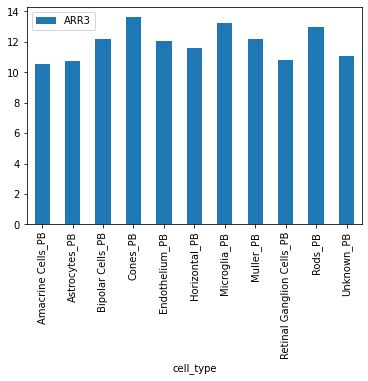

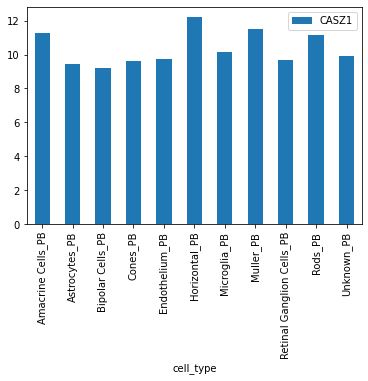

In [173]:
#CPM Normalization, log
df.plot(x="cell_type", y= "PPEF2", kind="bar")
df.plot(x="cell_type", y= "WWC1", kind="bar")
df.plot(x="cell_type", y= "ARR3", kind="bar")
df.plot(x="cell_type", y= "CASZ1", kind="bar")

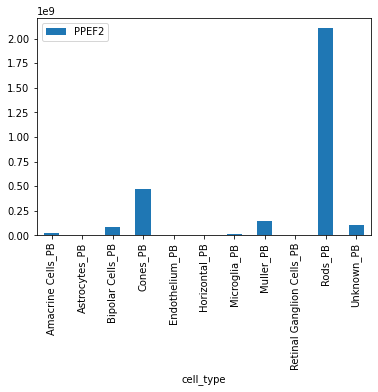

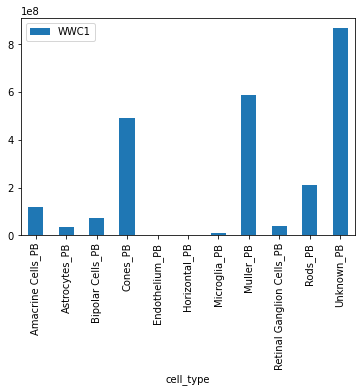

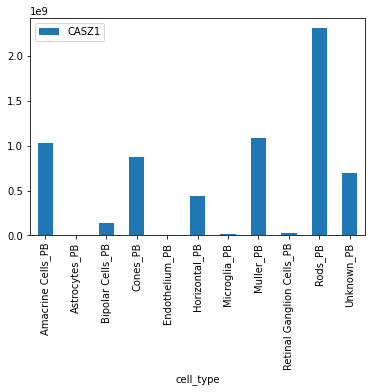

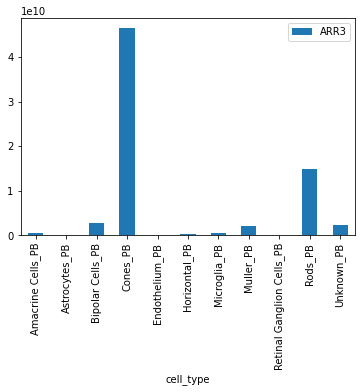

In [188]:
#CPM Normalization excluding highly expressed genes, no log
df.plot(x="cell_type", y= "PPEF2", kind="bar")
df.plot(x="cell_type", y= "WWC1", kind="bar")
df.plot(x="cell_type", y= "CASZ1", kind="bar")
df.plot(x="cell_type", y= "ARR3", kind="bar")

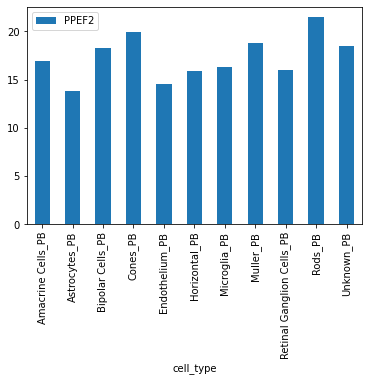

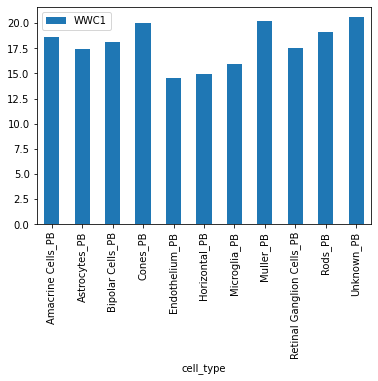

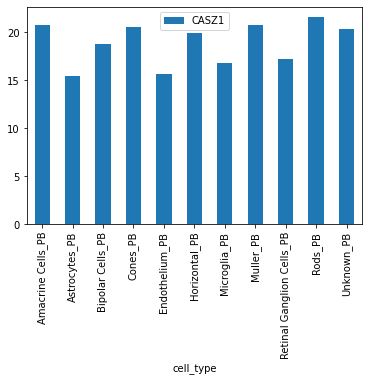

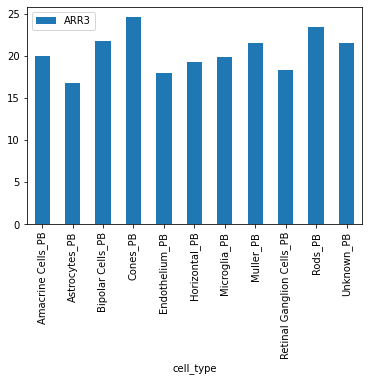

In [185]:
#CPM Normalization excluding highly expressed genes, log
df.plot(x="cell_type", y= "PPEF2", kind="bar")
df.plot(x="cell_type", y= "WWC1", kind="bar")
df.plot(x="cell_type", y= "CASZ1", kind="bar")
df.plot(x="cell_type", y= "ARR3", kind="bar")

In [189]:
#Normalise complete anndata
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)
print("normalized")

normalized


In [206]:
np.unique(adata.obs["cell type"])

array(['Amacrine Cells', 'Astrocytes', 'Bipolar Cells', 'Cones',
       'Endothelium', 'Horizontal', 'Microglia', 'Muller',
       'Retinal Ganglion Cells', 'Rods', 'Unknown'], dtype=object)

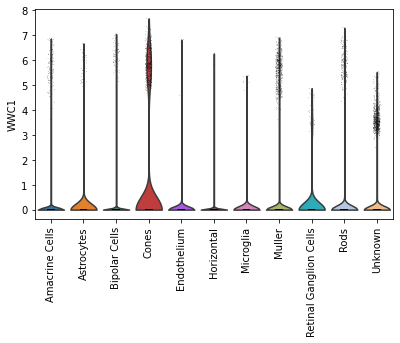

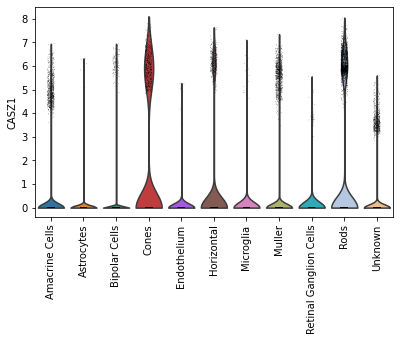

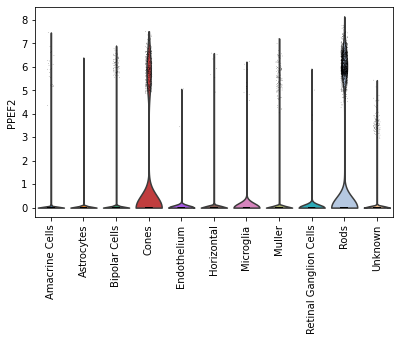

In [190]:
sc.pl.violin(adata, 'WWC1', groupby="cell type", rotation=90, size=0.5)
sc.pl.violin(adata, 'CASZ1', groupby="cell type", rotation=90, size=0.5)
sc.pl.violin(adata, 'PPEF2', groupby="cell type", rotation=90, size=0.5)

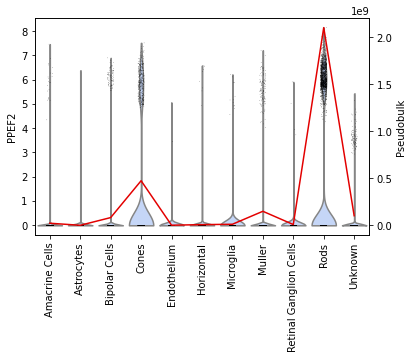

In [248]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
my_xticks = ['Amacrine Cells', 'Astrocytes', 'Bipolar Cells', 'Cones','Endothelium', 'Horizontal', 'Microglia', 'Muller','Retinal Ganglion Cells', 'Rods', 'Unknown']
x = np.arange(len(my_xticks))
y = df["PPEF2"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")
palette = ["#bdd3ff"]*11

sc.pl.violin(adata, 'PPEF2', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"PPEF2_violin_line.jpeg", dpi=900,bbox_inches="tight")


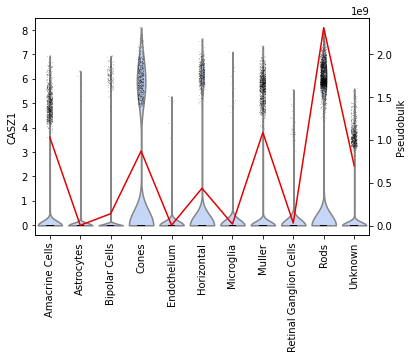

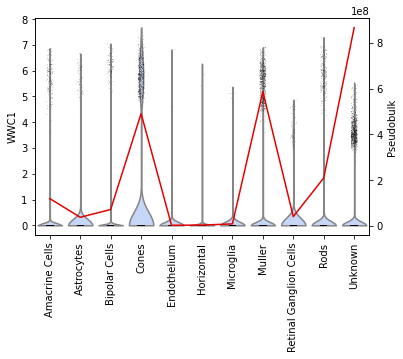

In [249]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["CASZ1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")
sc.pl.violin(adata, 'CASZ1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"CASZ1_violin_line", dpi=800,bbox_inches="tight")

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["WWC1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")
sc.pl.violin(adata, 'WWC1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"WWC1_violin_line", dpi=800,bbox_inches="tight")

### Lu 2020

In [ ]:
pathdir="/Users/rohan/public_html/Hegemon/Data2/Data/GSE138002/"
print("reading barcodes")
barcodes = pd.DataFrame(pd.read_csv(pathdir+'GSE138002_Final_barcodes.csv', sep = ';', header=0))
print("finished")
print("reading genes")
genes = pd.DataFrame(pd.read_csv(pathdir+'GSE138002_genes.csv', sep = ';',header=0))
genes.columns = ["ProbeID1","ProbeID","Name"]
genes = genes[["ProbeID","Name"]]
print("finished")
print("reading counts")
adata_lu = (scipy.io.mmread(pathdir+'GSE138002_Final_matrix.mtx'))
adata_lu = adata_lu.todense()
adata_lu = pd.DataFrame(adata_lu)
print("finished")
print("normalizing")
adata_lu = sc.AnnData(adata_lu.T)
adata_lu.obs['arr'] = np.array(barcodes['barcode'])
adata_lu.var['gene_ids']=np.array(genes["ProbeID"])
adata_lu.var['names']=np.array(genes["Name"])

db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "RT59"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()
print("Loaded hegemon object")

df = pd.read_csv(h.getSurv(), sep="\t")
print("Read surv file")
df.index = df.iloc[:,0]
for k in df.columns:
    k1 = re.sub("^c ", "", k)
    k1 = re.sub("^n ", "", k1)
    val = [df[k][i] if i in df.index else '' for i in adata_lu.obs['arr']]
    adata_lu.obs[k1] = val
    print("read column")
    
adata_lu.var_names = adata_lu.var["names"]
adata_lu.obs_names = adata_lu.obs["arr"]

celltype = list(adata_lu.obs["cell type"])
for i in range(len(celltype)):
    if celltype[i] == "Amacrine Cells":
        celltype[i] = "AC"
print(np.unique(celltype))
adata_lu.obs["celltype"] = celltype

source = list(adata_lu.obs["source_name"])
#Retinal Cells
celltype_RC = list(adata_lu.obs["celltype"])
for i in range(len(celltype_RC)):
    if source[i] != "Retinal Cells":
        celltype_RC[i] = "Unannotated"
adata_lu.obs["celltype_RC"] = celltype_RC
#Embryonic
celltype_EC = list(adata_lu.obs["celltype"])
for i in range(len(celltype_EC)):
    if source[i] != "human embryonic retina":
        celltype_EC[i] = "Unannotated"
adata_lu.obs["celltype_EC"] = celltype_EC
#Neonatal
celltype_NN = list(adata_lu.obs["celltype"])
for i in range(len(celltype_NN)):
    if source[i] != "human neonatal retina":
        celltype_NN[i] = "Unannotated"
adata_lu.obs["celltype_NN"] = celltype_NN

adata_lu

reading barcodes
finished
reading genes
finished
reading counts
finished
normalizing


In [265]:
#Retinal_Cells
adata_lu_sub = adata_lu[adata_lu.obs['source_name'].isin(['Retinal Cells']),:] 
expr_lu = pd.DataFrame(adata_lu_sub.X)
expr_lu.columns = adata_lu_sub.var_names
expr_lu.index = adata_lu_sub.obs_names
expr_lu["cell type"] = adata_lu_sub.obs["cell type"]
expr_lu["source"] = adata_lu_sub.obs["source_name"]
expr_lu = expr_lu.drop("source", axis=1)
cols = ["WWC1", "PPEF2", "CASZ1", "AKAP9", "ARR3", "celltype"]
expr_lu = expr_lu[cols]
expr_lu

names                      WWC1  PPEF2  CASZ1  AKAP9  ARR3  \
arr                                                          
24_Day.AACTCCCGTTTAGGAA-1   0.0    0.0    0.0    0.0   0.0   
24_Day.AGATCTGTCTTGCATT-1   0.0    0.0    0.0    0.0   0.0   
24_Day.AGCAGCCTCCGCTGTT-1   0.0    0.0    0.0    0.0   0.0   
24_Day.AGGGAGTTCGTAGATC-1   0.0    0.0    0.0    0.0   0.0   
24_Day.ATTATCCTCGCCCTTA-1   0.0    0.0    0.0    0.0   0.0   
...                         ...    ...    ...    ...   ...   
Hgw9.TTTGTCAGTGACCAAG-1     0.0    0.0    0.0    0.0   0.0   
Hgw9.TTTGTCAGTGATGTGG-1     0.0    0.0    0.0    1.0   0.0   
Hgw9.TTTGTCATCACAGTAC-1     0.0    0.0    2.0    5.0   0.0   
Hgw9.TTTGTCATCCAACCAA-1     0.0    0.0    0.0    0.0   0.0   
Hgw9.TTTGTCATCTATCCTA-1     0.0    0.0    0.0    0.0   0.0   

names                                   cell type         source  
arr                                                               
24_Day.AACTCCCGTTTAGGAA-1                    RPCs  Retinal Cells  
24_Day.AGATCTGTCTTGCATT-1                    RPCs  Retinal Cells  
24_Day.AGCAGCCTCCGCTGTT-1                    RPCs  Retinal Cells  
24_Day.AGGGAGTTCGTAGATC-1                    RPCs  Retinal Cells  
24_Day.ATTATCCTCGCCCTTA-1                    RPCs  Retinal Cells  
...                                           ...            ...  
Hgw9.TTTGTCAGTGACCAAG-1                      RPCs  Retinal Cells  
Hgw9.TTTGTCAGTGATGTGG-1                      RPCs  Retinal Cells  
Hgw9.TTTGTCATCACAGTAC-1                      RPCs  Retinal Cells  
Hgw9.TTTGTCATCCAACCAA-1    Retinal Ganglion Cells  Retinal Cells  
Hgw9.TTTGTCATCTATCCTA-1                      RPCs  Retinal Cells  

[71849 rows x 7 columns]

In [284]:
#df: matrix of raw counts with genes as column names and cell types as a column
def pseudoBulk(df):
    cell_type = np.unique(np.array(df["cell type"]))
    pbDF = pd.DataFrame()
    for i in cell_type:
        print(i)
        tempdf = df.loc[df["cell type"] == i]
        tempdf = tempdf.drop("cell type", axis=1)
        pbDF[i+"_PB"] = tempdf.sum(axis=0, skipna=True)
    adata = sc.AnnData(pbDF.T)
    sc.pp.normalize_total(adata, target_sum=1e6,exclude_highly_expressed=True)
    #sc.pp.log1p(adata)
    adata.obs['cell_type'] = np.array(pbDF.columns)
    adata.var['gene_names'] = np.array(pbDF.index)
    adata.var_names = adata.var["gene_names"]
    adata.obs_names = adata.obs['cell_type']
    return(pbDF, adata)

AC/HC_Precurs
Amacrine Cells
BC/Photo_Precurs
Bipolar Cells
Cones
Horizontal Cells
Muller Glia
Neurogenic Cells
RPCs
Retinal Ganglion Cells
Rods


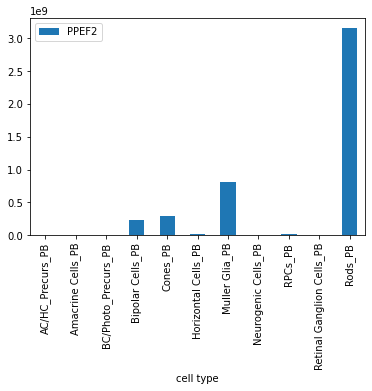

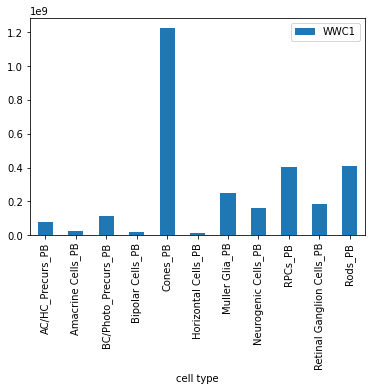

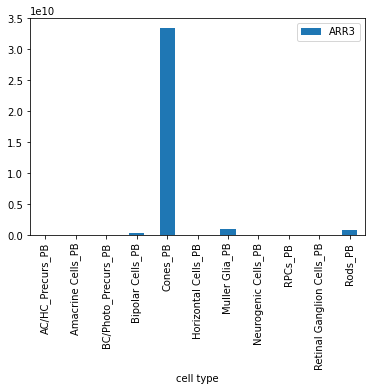

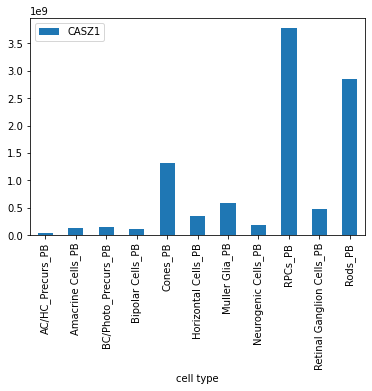

In [291]:
retinal_lu_PB = pseudoBulk(expr_lu)
df = pd.DataFrame(retinal_lu_PB[1].X)
df.columns = retinal_lu_PB[1].var_names
df.index = retinal_lu_PB[1].obs_names
df["cell type"] = df.index
#CPM Normalization, no log, exclude highly expressed genes
df.plot(x="cell type", y= "PPEF2", kind="bar")
df.plot(x="cell type", y= "WWC1", kind="bar")
df.plot(x="cell type", y= "ARR3", kind="bar")
df.plot(x="cell type", y= "CASZ1", kind="bar")

In [292]:
pathdir = "/Users/rohan/public_html/Hegemon/Data2/Data/GSE138002/"
df.to_csv(pathdir+"pseudobulk_lu2020.txt", sep="\t")

starting gse138002


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


normalized


... storing 'title' as categorical
... storing 'cell source' as categorical
... storing 'developmental stage' as categorical
... storing 'molecule' as categorical
... storing 'organism' as categorical
... storing 'source_name' as categorical
... storing 'tissue' as categorical
... storing 'age' as categorical
... storing 'sample_region' as categorical
... storing 'cell type' as categorical
... storing 'celltype' as categorical
... storing 'celltype_RC' as categorical
... storing 'celltype_EC' as categorical
... storing 'celltype_NN' as categorical
... storing 'names' as categorical


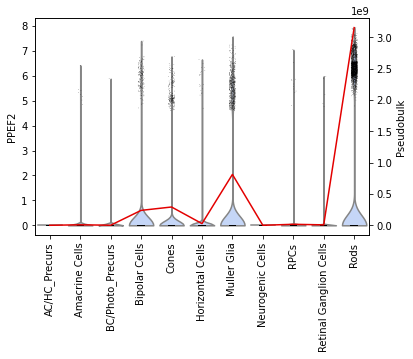

ppef2


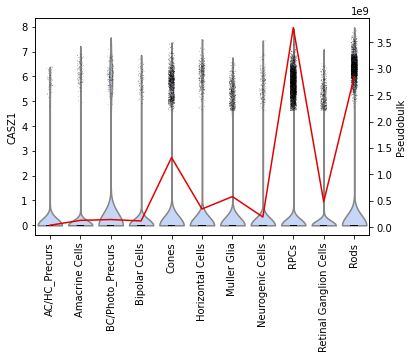

casz1


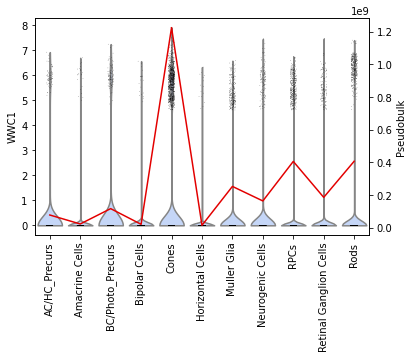

wwc1
starting gse116106
subsetted


KeyError: "['celltype'] not in index"

In [302]:
#Retinal Cells GSE138002
print("starting gse138002")
sc.pp.normalize_total(adata_lu_sub, target_sum=1e6)
sc.pp.log1p(adata_lu_sub)
print("normalized")
##PPEF2

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
my_xticks = [i.split(sep="_")[0] for i in np.unique(df.index)]
my_xticks[0] = "AC/HC Precurs"
my_xticks[2] = "BC/Photo Precurs"
x = np.arange(len(my_xticks))
y = df["PPEF2"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")
palette = ["#bdd3ff"]*11

sc.pl.violin(adata_lu_sub, 'PPEF2', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"PPEF2_violin_line_GSE138002.jpeg", dpi=900,bbox_inches="tight")
print("ppef2")
##CASZ1

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["CASZ1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")

sc.pl.violin(adata_lu_sub, 'CASZ1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"CASZ1_violin_line_GSE138002.jpeg", dpi=900,bbox_inches="tight")
print("casz1")
##WWC1

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["WWC1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")

sc.pl.violin(adata_lu_sub, 'WWC1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"WWC1_violin_line_GSE138002.jpeg", dpi=900,bbox_inches="tight")
print("wwc1")

In [305]:
expr_lu

names                     RP11-34P13.3  FAM138A  OR4F5  RP11-34P13.7  \
arr                                                                    
Hgw12.AAACCTGAGACAGACC-1           0.0      0.0    0.0           0.0   
Hgw12.AAACCTGAGAGCTGCA-1           0.0      0.0    0.0           0.0   
Hgw12.AAACCTGAGCAATCTC-1           0.0      0.0    0.0           0.0   
Hgw12.AAACCTGAGTACGACG-1           0.0      0.0    0.0           0.0   
Hgw12.AAACCTGAGTTACCCA-1           0.0      0.0    0.0           0.0   
...                                ...      ...    ...           ...   
Hgw27.TTTGGTTAGGCACATG-1           0.0      0.0    0.0           0.0   
Hgw27.TTTGTCAAGATATACG-1           0.0      0.0    0.0           0.0   
Hgw27.TTTGTCAAGGATTCGG-1           0.0      0.0    0.0           0.0   
Hgw27.TTTGTCACAAGGTTCT-1           0.0      0.0    0.0           0.0   
Hgw27.TTTGTCATCTCCAGGG-1           0.0      0.0    0.0           0.0   

names                     RP11-34P13.8  RP11-34P13.14  RP11-34P13.9  \
arr                                                                   
Hgw12.AAACCTGAGACAGACC-1           0.0            0.0           0.0   
Hgw12.AAACCTGAGAGCTGCA-1           0.0            0.0           0.0   
Hgw12.AAACCTGAGCAATCTC-1           0.0            0.0           0.0   
Hgw12.AAACCTGAGTACGACG-1           0.0            0.0           0.0   
Hgw12.AAACCTGAGTTACCCA-1           0.0            0.0           0.0   
...                                ...            ...           ...   
Hgw27.TTTGGTTAGGCACATG-1           0.0            0.0           0.0   
Hgw27.TTTGTCAAGATATACG-1           0.0            0.0           0.0   
Hgw27.TTTGTCAAGGATTCGG-1           0.0            0.0           0.0   
Hgw27.TTTGTCACAAGGTTCT-1           0.0            0.0           0.0   
Hgw27.TTTGTCATCTCCAGGG-1           0.0            0.0           0.0   

names                     FO538757.3  FO538757.2  AP006222.2  ...  BX072566.1  \
arr                                                           ...               
Hgw12.AAACCTGAGACAGACC-1         0.0         0.0         0.0  ...         0.0   
Hgw12.AAACCTGAGAGCTGCA-1         0.0         0.0         0.0  ...         0.0   
Hgw12.AAACCTGAGCAATCTC-1         0.0         0.0         0.0  ...         0.0   
Hgw12.AAACCTGAGTACGACG-1         0.0         0.0         0.0  ...         0.0   
Hgw12.AAACCTGAGTTACCCA-1         0.0         0.0         0.0  ...         0.0   
...                              ...         ...         ...  ...         ...   
Hgw27.TTTGGTTAGGCACATG-1         0.0         0.0         0.0  ...         0.0   
Hgw27.TTTGTCAAGATATACG-1         0.0         1.0         0.0  ...         0.0   
Hgw27.TTTGTCAAGGATTCGG-1         0.0         0.0         0.0  ...         0.0   
Hgw27.TTTGTCACAAGGTTCT-1         0.0         0.0         0.0  ...         0.0   
Hgw27.TTTGTCATCTCCAGGG-1         0.0         0.0         0.0  ...         0.0   

names                     AL354822.1  AC023491.2  AC004556.1  AC233755.2  \
arr                                                                        
Hgw12.AAACCTGAGACAGACC-1         0.0         0.0         0.0         0.0   
Hgw12.AAACCTGAGAGCTGCA-1         0.0         0.0         0.0         0.0   
Hgw12.AAACCTGAGCAATCTC-1         0.0         0.0         0.0         0.0   
Hgw12.AAACCTGAGTACGACG-1         0.0         0.0         0.0         0.0   
Hgw12.AAACCTGAGTTACCCA-1         0.0         0.0         0.0         0.0   
...                              ...         ...         ...         ...   
Hgw27.TTTGGTTAGGCACATG-1         0.0         0.0         0.0         0.0   
Hgw27.TTTGTCAAGATATACG-1         0.0         0.0         0.0         0.0   
Hgw27.TTTGTCAAGGATTCGG-1         0.0         0.0         0.0         0.0   
Hgw27.TTTGTCACAAGGTTCT-1         0.0         0.0         0.0         0.0   
Hgw27.TTTGTCATCTCCAGGG-1         0.0         0.0         0.0         0.0   

names                     AC233755.1  AC240274.1  AC213203.1  FAM231B  \
arr                    

starting gse116106
df ready
AC/HC_Precurs
Amacrine Cells
BC/Photo_Precurs
Bipolar Cells
Cones
Horizontal Cells
Muller Glia
Neurogenic Cells
RPCs
Retinal Ganglion Cells
Rods
pseudobulk complete
pbdf ready


/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


normalized anndata


... storing 'title' as categorical
... storing 'cell source' as categorical
... storing 'developmental stage' as categorical
... storing 'molecule' as categorical
... storing 'organism' as categorical
... storing 'source_name' as categorical
... storing 'tissue' as categorical
... storing 'age' as categorical
... storing 'sample_region' as categorical
... storing 'cell type' as categorical
... storing 'celltype' as categorical
... storing 'celltype_RC' as categorical
... storing 'celltype_EC' as categorical
... storing 'celltype_NN' as categorical
... storing 'names' as categorical


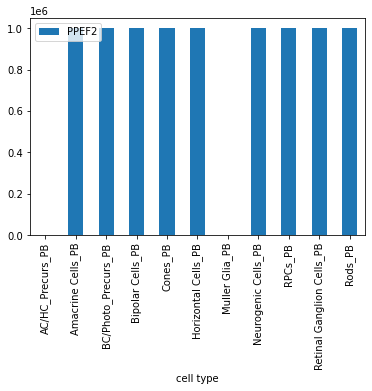

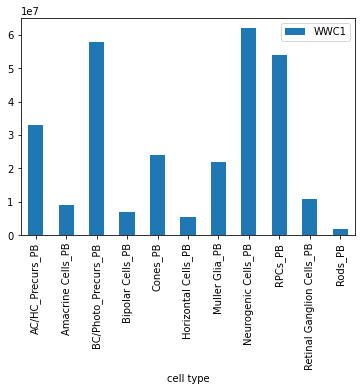

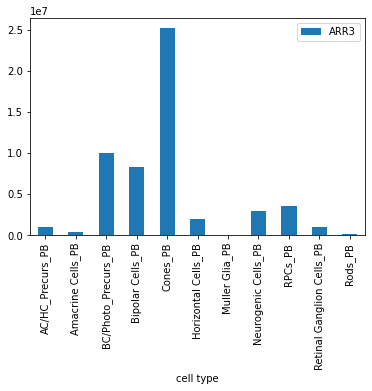

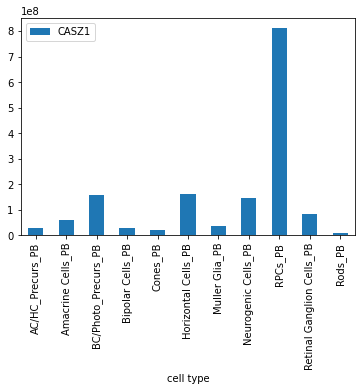

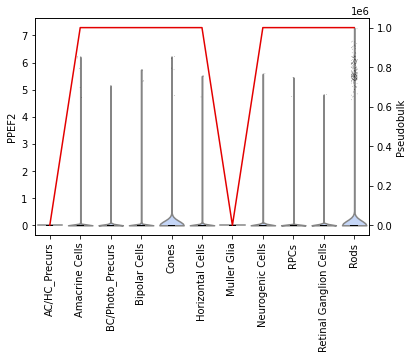

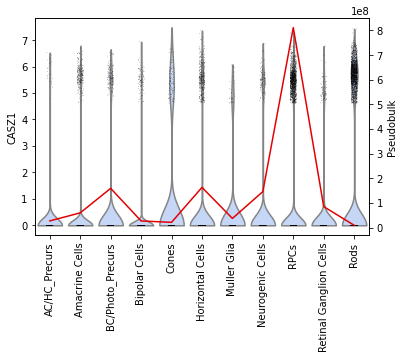

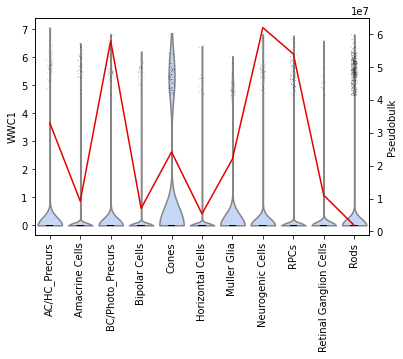

finished gse116106


In [306]:
print("starting gse116106")
#Embryonic Cells GSE116106
adata_lu_sub = adata_lu[adata_lu.obs['source_name'].isin(["human embryonic retina"]),:] 
print("subsetted")
expr_lu = pd.DataFrame(adata_lu_sub.X)
expr_lu.columns = adata_lu_sub.var_names
expr_lu.index = adata_lu_sub.obs_names
expr_lu["cell type"] = adata_lu_sub.obs["cell type"]
expr_lu["source"] = adata_lu_sub.obs["source_name"]
expr_lu = expr_lu.drop("source", axis=1)

cols = ["WWC1", "PPEF2", "CASZ1", "AKAP9", "ARR3", "cell type"]
expr_lu = expr_lu[cols]
print("df ready")

embryonic_lu_PB = pseudoBulk(expr_lu)
print("pseudobulk complete")
df = pd.DataFrame(embryonic_lu_PB[1].X)
df.columns = embryonic_lu_PB[1].var_names
df.index = embryonic_lu_PB[1].obs_names
df["cell type"] = df.index
print("pbdf ready")

#CPM Normalization, no log, exclude highly expressed genes
df.plot(x="cell type", y= "PPEF2", kind="bar")
df.plot(x="cell type", y= "WWC1", kind="bar")
df.plot(x="cell type", y= "ARR3", kind="bar")
df.plot(x="cell type", y= "CASZ1", kind="bar")

#Normaliza anndata
sc.pp.normalize_total(adata_lu_sub, target_sum=1e6)
sc.pp.log1p(adata_lu_sub)
print("normalized anndata")

##PPEF2

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
my_xticks = [i.split(sep="_")[0] for i in np.unique(df.index)]
my_xticks[0] = "AC/HC Precurs"
my_xticks[2] = "BC/Photo Precurs"
x = np.arange(len(my_xticks))
y = df["PPEF2"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")
palette = ["#bdd3ff"]*11

sc.pl.violin(adata_lu_sub, 'PPEF2', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"PPEF2_violin_line_GSE116106.jpeg", dpi=900,bbox_inches="tight")

##CASZ1

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["CASZ1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")

sc.pl.violin(adata_lu_sub, 'CASZ1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"CASZ1_violin_line_GSE116106.jpeg", dpi=900,bbox_inches="tight")

##WWC1

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["WWC1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")

sc.pl.violin(adata_lu_sub, 'WWC1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"WWC1_violin_line_GSE116106.jpeg", dpi=900,bbox_inches="tight")

print("finished gse116106")

In [325]:
print("starting gse116106")
#Embryonic Cells GSE116106
adata_lu_sub = adata_lu[adata_lu.obs['source_name'].isin(["human embryonic retina"]),:] 
print("subsetted")

expr_lu = pd.DataFrame(adata_lu_sub.X)
expr_lu.columns = adata_lu_sub.var_names
expr_lu.index = adata_lu_sub.obs_names
expr_lu["cell type"] = adata_lu_sub.obs["cell type"]
#expr_lu["source"] = adata_lu_sub.obs["source_name"]
#expr_lu = expr_lu.drop("source", axis=1)

cols = ["WWC1", "PPEF2", "CASZ1", "AKAP9", "ARR3", "cell type"]
expr_lu = expr_lu[cols]
print("df ready")

embryonic_lu_PB = pseudoBulk(expr_lu)
print("pseudobulk complete")
df = pd.DataFrame(embryonic_lu_PB[1].X)
df.columns = embryonic_lu_PB[1].var_names
df.index = embryonic_lu_PB[1].obs_names
df["cell type"] = df.index
print("pbdf ready")

#CPM Normalization, no log, exclude highly expressed genes
df.plot(x="cell type", y= "PPEF2", kind="bar")
df.plot(x="cell type", y= "WWC1", kind="bar")
df.plot(x="cell type", y= "ARR3", kind="bar")
df.plot(x="cell type", y= "CASZ1", kind="bar")

#Normaliza anndata
adata_lu_norm = sc.pp.normalize_total(adata_lu, target_sum=1e6)
sc.pp.log1p(adata_lu_norm)
print("normalized anndata")

adata_lu_sub = adata_lu_norm[adata_lu_norm.obs['source_name'].isin(["human embryonic retina"]),:] 
print("subsetted")
##PPEF2

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
my_xticks = [i.split(sep="_")[0] for i in np.unique(df.index)]
my_xticks[0] = "AC/HC Precurs"
my_xticks[2] = "BC/Photo Precurs"
x = np.arange(len(my_xticks))
y = df["PPEF2"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")
palette = ["#bdd3ff"]*11

sc.pl.violin(adata_lu_sub, 'PPEF2', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"PPEF2_violin_line_GSE116106.jpeg", dpi=900,bbox_inches="tight")

##CASZ1

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["CASZ1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")

sc.pl.violin(adata_lu_sub, 'CASZ1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"CASZ1_violin_line_GSE116106.jpeg", dpi=900,bbox_inches="tight")

##WWC1

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["WWC1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")

sc.pl.violin(adata_lu_sub, 'WWC1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"WWC1_violin_line_GSE116106.jpeg", dpi=900,bbox_inches="tight")

print("finished gse116106")

starting gse116106
subsetted


MemoryError: Unable to allocate 4.94 GiB for an array with shape (39324, 33694) and data type float32

starting gse122970
subsetted
df ready
Amacrine Cells
Bipolar Cells
Cones
Horizontal Cells
Muller Glia
RPCs
Rods
pseudobulk complete
pbdf ready


/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


normalized anndata


... storing 'title' as categorical
... storing 'cell source' as categorical
... storing 'developmental stage' as categorical
... storing 'molecule' as categorical
... storing 'organism' as categorical
... storing 'source_name' as categorical
... storing 'tissue' as categorical
... storing 'age' as categorical
... storing 'sample_region' as categorical
... storing 'cell type' as categorical
... storing 'celltype' as categorical
... storing 'celltype_RC' as categorical
... storing 'celltype_EC' as categorical
... storing 'celltype_NN' as categorical
... storing 'names' as categorical


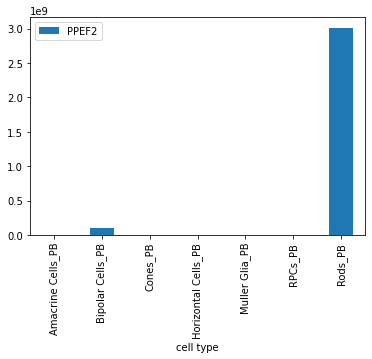

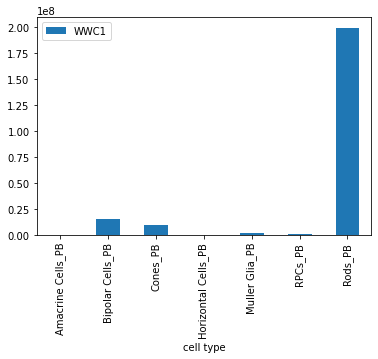

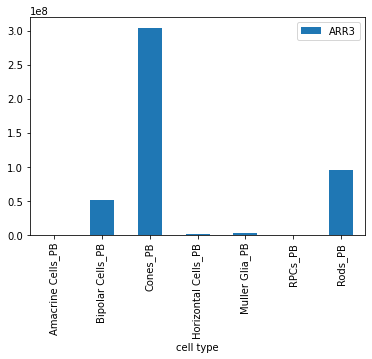

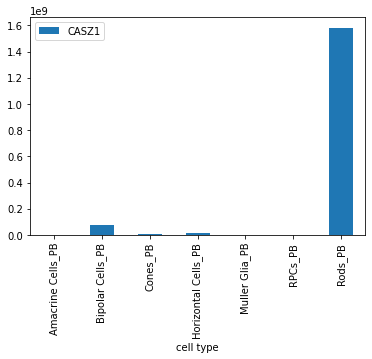

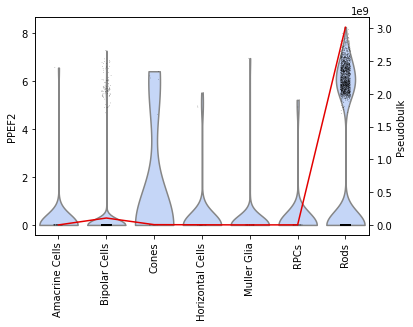

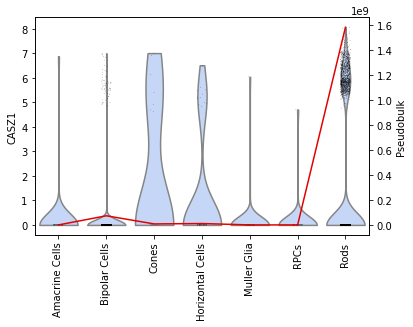

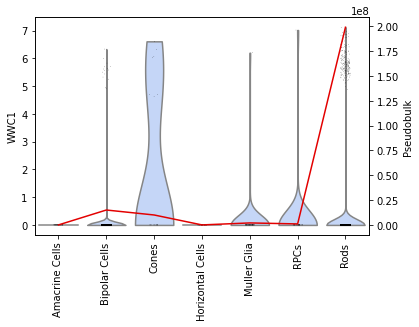

finished gse122970


In [308]:
print("starting gse122970")
#Neonatal Cells GSE122970
adata_lu_sub = adata_lu[adata_lu.obs['source_name'].isin(["human neonatal retina"]),:] 
print("subsetted")
expr_lu = pd.DataFrame(adata_lu_sub.X)
expr_lu.columns = adata_lu_sub.var_names
expr_lu.index = adata_lu_sub.obs_names
expr_lu["cell type"] = adata_lu_sub.obs["cell type"]
expr_lu["source"] = adata_lu_sub.obs["source_name"]
expr_lu = expr_lu.drop("source", axis=1)
cols = ["WWC1", "PPEF2", "CASZ1", "AKAP9", "ARR3", "cell type"]
expr_lu = expr_lu[cols]
print("df ready")

embryonic_lu_PB = pseudoBulk(expr_lu)
print("pseudobulk complete")
df = pd.DataFrame(embryonic_lu_PB[1].X)
df.columns = embryonic_lu_PB[1].var_names
df.index = embryonic_lu_PB[1].obs_names
df["cell type"] = df.index
print("pbdf ready")

#CPM Normalization, no log, exclude highly expressed genes
df.plot(x="cell type", y= "PPEF2", kind="bar")
df.plot(x="cell type", y= "WWC1", kind="bar")
df.plot(x="cell type", y= "ARR3", kind="bar")
df.plot(x="cell type", y= "CASZ1", kind="bar")

#Normaliza anndata
sc.pp.normalize_total(adata_lu_sub, target_sum=1e6)
sc.pp.log1p(adata_lu_sub)
print("normalized anndata")

##PPEF2

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
my_xticks = [i.split(sep="_")[0] for i in np.unique(df.index)]
my_xticks[0] = "AC/HC Precurs"
my_xticks[2] = "BC/Photo Precurs"
x = np.arange(len(my_xticks))
y = df["PPEF2"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")
palette = ["#bdd3ff"]*11

sc.pl.violin(adata_lu_sub, 'PPEF2', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"PPEF2_violin_line_GSE122970.jpeg", dpi=900,bbox_inches="tight")

##CASZ1

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["CASZ1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")

sc.pl.violin(adata_lu_sub, 'CASZ1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"CASZ1_violin_line_GSE122970.jpeg", dpi=900,bbox_inches="tight")

##WWC1

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["WWC1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")

sc.pl.violin(adata_lu_sub, 'WWC1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"WWC1_violin_line_GSE122970.jpeg", dpi=900,bbox_inches="tight")

print("finished gse122970")

In [309]:
df #GSE122970

gene_names                  WWC1         PPEF2         CASZ1         AKAP9  \
cell_type                                                                    
Amacrine Cells_PB            0.0  1.000000e+06  1.000000e+06  3.800000e+07   
Bipolar Cells_PB      15000000.0  1.060000e+08  7.400000e+07  2.621000e+09   
Cones_PB              10000000.0  5.000000e+06  9.000000e+06  8.700000e+07   
Horizontal Cells_PB          0.0  3.000000e+06  1.200000e+07  1.100000e+08   
Muller Glia_PB         2000000.0  1.000000e+06  1.000000e+06  2.300000e+07   
RPCs_PB                1000000.0  2.000000e+06  1.000000e+06  4.700000e+07   
Rods_PB              199000000.0  3.013000e+09  1.581000e+09  1.681900e+10   

gene_names                  ARR3            cell type  
cell_type                                              
Amacrine Cells_PB            0.0    Amacrine Cells_PB  
Bipolar Cells_PB      52000000.0     Bipolar Cells_PB  
Cones_PB             304000000.0             Cones_PB  
Horizontal Cells_PB    2000000.0  Horizontal Cells_PB  
Muller Glia_PB         3000000.0       Muller Glia_PB  
RPCs_PB                      0.0              RPCs_PB  
Rods_PB               96000000.0              Rods_PB